In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [190]:
hdf = h5py.File('off_res.h5', 'r')
I = np.array(hdf['i_signal'])
Q = np.array(hdf['q_signal'])
#print(I)

In [191]:
I_mean = []
Q_mean = []
for i in range(len(I)):
    I_mean.append(I[i].mean())
    Q_mean.append(Q[i].mean())


-0.14811602482859598 0.13088894828615594


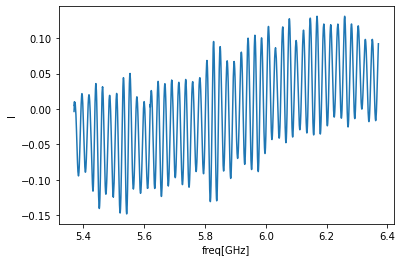

In [198]:
ref = 5.87045 
x = []
for i in range(-2500,2500):
    x.append(ref + i*0.0002) 
plt.plot(x,I_mean)
plt.xlabel('freq[GHz]')
plt.ylabel('I')
print(min(I_mean),max(I_mean))

-0.2501909475710272 0.044877171778171035


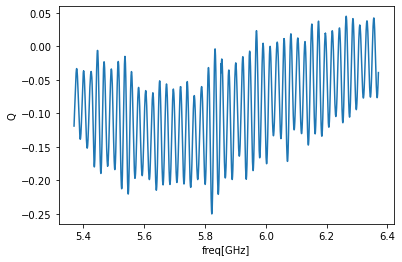

In [193]:
plt.plot(x,Q_mean)
plt.xlabel('freq[GHz]')
plt.ylabel('Q')
print(min(Q_mean),max(Q_mean))
#plt.xlim(5.862,5.868)

Text(0, 0.5, 'I')

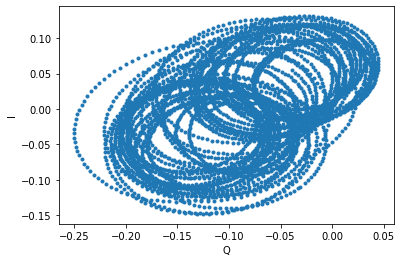

In [194]:
plt.scatter(Q_mean, I_mean, marker='.')
plt.xlabel('Q')
plt.ylabel('I')

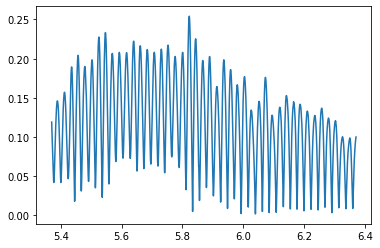

In [195]:
plt.plot(x,(np.array(Q_mean)**2+np.array(I_mean)**2)**0.5)